# Costos de producción en cultivos agrícolas 

## Descripción de cultivos:

Estos cultivos tienen diversos patrones de crecimiento, distintas prácticas de cultivo y contribuyen significativamente al sector agrícola, la seguridad alimentaria y la economía general.

> Arverja: Es un cultivo de legumbres y una importante fuente de proteínas. Es conocido por su tolerancia a la sequía y se suele intercalar con otros cultivos. Sus granos contienen proteínas, carbohidratos, vitaminas y minerales.

> Algodón: El algodón es un cultivo comercial crucial se utiliza en la  la industria textil y para algunos aceites extraídos de sus semillas.

> Garbanzo: Es una legumbre que se cultiva habitualmente en India.  Es un ingrediente esencial de muchos platos y es conocido por su valor nutritivo.

> Cacahuete: El cacahuete es una semilla oleaginosa que se utiliza para la extracción de aceite, como aperitivo y como ingrediente en diversos productos alimenticios. 

> Maíz: El maíz es un cereal que se cultiva en distintas regiones para alimentación animal, consumo humano y como materia prima para diversas industrias.

> Arroz: El arroz es un cereal considerado alimento básico en muchas gastronomías del mundo.​El arroz es el segundo cereal más producido en el mundo, por detrás del maíz y por delante del trigo.​​

> Colza y mostaza: Son semillas oleaginosas que se cultivan  para la extracción de aceite y son ingredientes importantes en la cocina .

> Frijol Verde:  Es un cultivo de legumbres 

> Caña de azúcar: La caña de azúcar es un cultivo comercial muy extendido. Se cultiva principalmente para la producción de azúcar y es un producto importante en la agroindustria.

> Trigo: El trigo es uno de los principales cereales. Sirve como alimento básico y es el segundo cultivo de cereales más importante después del arroz en términos de producción.

## Importar Librerías 

In [13]:
#!pip uninstall scikit-learn
! pip install --upgrade scikit-learn
! pip install --upgrade joblib
! pip install xgboost==2.0.0


In [14]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score


## Importar el dataset

In [15]:
df1 = pd.read_csv('dataset\datafile (1).csv')
df1 = df1.drop('Cost of Cultivation (`/Hectare) A2+FL', axis=1)
df1.head()

,Crop,State,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,23076.74,1941.55,9.83
1,ARHAR,Karnataka,16528.68,2172.46,7.47
2,ARHAR,Gujarat,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,25270.26,2775.80,8.72


In [16]:
df1.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

Para mayor claridad en el data set se cambian los nombres de las columnas. Así mismo, con los diferentes nombres de los cultivos. Posteriormente se revisa el tamaño del dataste y el tipo de datos de las columnas 

In [17]:
cambio_nombre_columnas = {
    
    'Crop' : 'Cultivo',
    'State': 'Estado',
    'Cost of Cultivation (`/Hectare) C2' : 'Coste de cultivo (/Hectárea)',
    'Cost of Production (`/Quintal) C2' : 'Coste de producción (/Quintal)', 
    'Yield (Quintal/ Hectare) ':'Rendimiento (Quintal/ Hectárea)'

}
df1 = df1.rename(columns=cambio_nombre_columnas)
df1.head()

,Cultivo,Estado,Coste de cultivo (/Hectárea),Coste de producción (/Quintal),Rendimiento (Quintal/ Hectárea)
0,ARHAR,Uttar Pradesh,23076.74,1941.55,9.83
1,ARHAR,Karnataka,16528.68,2172.46,7.47
2,ARHAR,Gujarat,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,25270.26,2775.80,8.72


- Coste de cultivo (/Hectárea): Esta métrica se refiere al coste global del cultivo por hectárea. Incluye todos los costes contemplados en A2+FL y también tiene en cuenta el valor de alquiler de la tierra en propiedad y los intereses sobre el valor de los activos fijos de capital, como la maquinaria agrícola y los edificios. El Coste_C2 proporciona una estimación más completa de los gastos totales en que incurren los agricultores.

- Coste de producción (/Quintal): Este parámetro representa el coste de producción por quintal de producción. Calcula el coste medio necesario para producir un quintal (100 kilogramos) del cultivo, teniendo en cuenta todos los costes implicados en el cultivo mencionados en Cost_C2.

- Rendimiento (Quintal/ Hectárea): El rendimiento es una medida de la productividad de los cultivos y representa la cantidad de cultivo producida por hectárea de tierra. Suele medirse en quintales, donde un quintal equivale a 100 kilogramos. El rendimiento es un indicador importante de la eficiencia agrícola y determina la cantidad de cosecha obtenida de una superficie de tierra determinada.

In [18]:
#Cambiar nombre de cultivo 
cambio_nombre_cultivos ={
    'GRAM':'GARBANZO',
    'COTTON': 'ALGODÓN',
    'GROUNDNUT' : 'CACAHUETE',
    'MAIZE': 'MAÍZ',
    'MOONG' : 'FRIJOL VERDE',
    'PADDY': 'ARROZ',
    'RAPESEED AND MUSTARD': 'COLZA Y MOSTAZA',
    'SUGARCANE':'CAÑA DE AZÚCAR',
    'WHEAT':'TRIGO',
    'ARHAR':'ARVEJA'

}

df1['Cultivo'] = df1['Cultivo'].replace(cambio_nombre_cultivos)

#Valores únicos en la columna 'Cultivo'
crop_column= df1['Cultivo']
unique_crops = crop_column.unique()
print(unique_crops)

['ARVEJA' 'ALGODÓN' 'GARBANZO' 'CACAHUETE' 'MAÍZ' 'FRIJOL VERDE' 'ARROZ'
 'COLZA Y MOSTAZA' 'CAÑA DE AZÚCAR' 'TRIGO']


## Análisis exploratorio de los datos

In [19]:
df1.shape

(49, 5)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cultivo                          49 non-null     object 
 1   Estado                           49 non-null     object 
 2   Coste de cultivo (/Hectárea)     49 non-null     float64
 3   Coste de producción (/Quintal)   49 non-null     float64
 4   Rendimiento (Quintal/ Hectárea)  49 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.0+ KB


Se eliminan los valores nulos y se verifica que todas las columnas tengan 0 valores nulos. A su vez se verifica el tamaño de datos por cultivo. Arrojando 5 valores por cada cultivo a excepción del cultivo de trigo.

In [21]:
df1.dropna(True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22468\2310702865.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1.dropna(True)


,Cultivo,Estado,Coste de cultivo (/Hectárea),Coste de producción (/Quintal),Rendimiento (Quintal/ Hectárea)
0,ARVEJA,Uttar Pradesh,23076.74,1941.55,9.83
1,ARVEJA,Karnataka,16528.68,2172.46,7.47
2,ARVEJA,Gujarat,19551.90,1898.30,9.59
3,ARVEJA,Andhra Pradesh,24171.65,3670.54,6.42
4,ARVEJA,Maharashtra,25270.26,2775.80,8.72
5,ALGODÓN,Maharashtra,33116.82,2539.47,12.69
6,ALGODÓN,Punjab,50828.83,2003.76,24.39
7,ALGODÓN,Andhra Pradesh,44756.72,2509.99,17.83
8,ALGODÓN,Gujarat,42070.44,2179.26,19.05
9,ALGODÓN,Haryana,44018.18,2127.35,19.90


In [22]:
df1.isnull().sum()

Cultivo                            0
Estado                             0
Coste de cultivo (/Hectárea)       0
Coste de producción (/Quintal)     0
Rendimiento (Quintal/ Hectárea)    0
dtype: int64

In [23]:
df1.Cultivo.value_counts()

ARVEJA             5
ALGODÓN            5
GARBANZO           5
CACAHUETE          5
MAÍZ               5
FRIJOL VERDE       5
ARROZ              5
COLZA Y MOSTAZA    5
CAÑA DE AZÚCAR     5
TRIGO              4
Name: Cultivo, dtype: int64

<Axes: >

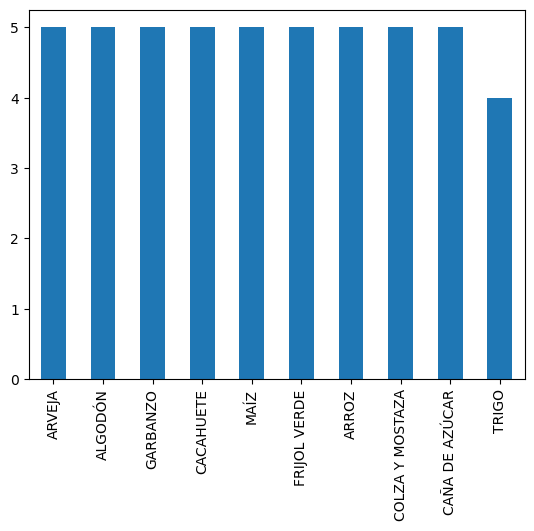

In [24]:
crop_count = df1.Cultivo.value_counts()
crop_count.plot.bar()

en esta grafica se pude observar que el cultivo con mayor rendimiento es la caña de azúcar. 

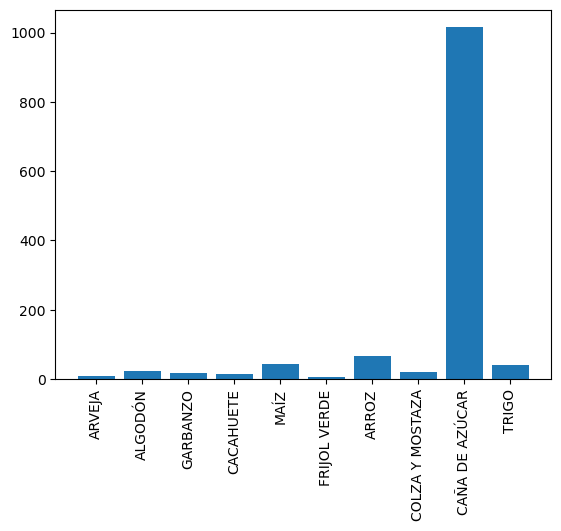

In [25]:
x=df1["Rendimiento (Quintal/ Hectárea)"]
y = df1 ["Cultivo"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22468\3551105356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot= True, cmap='coolwarm')


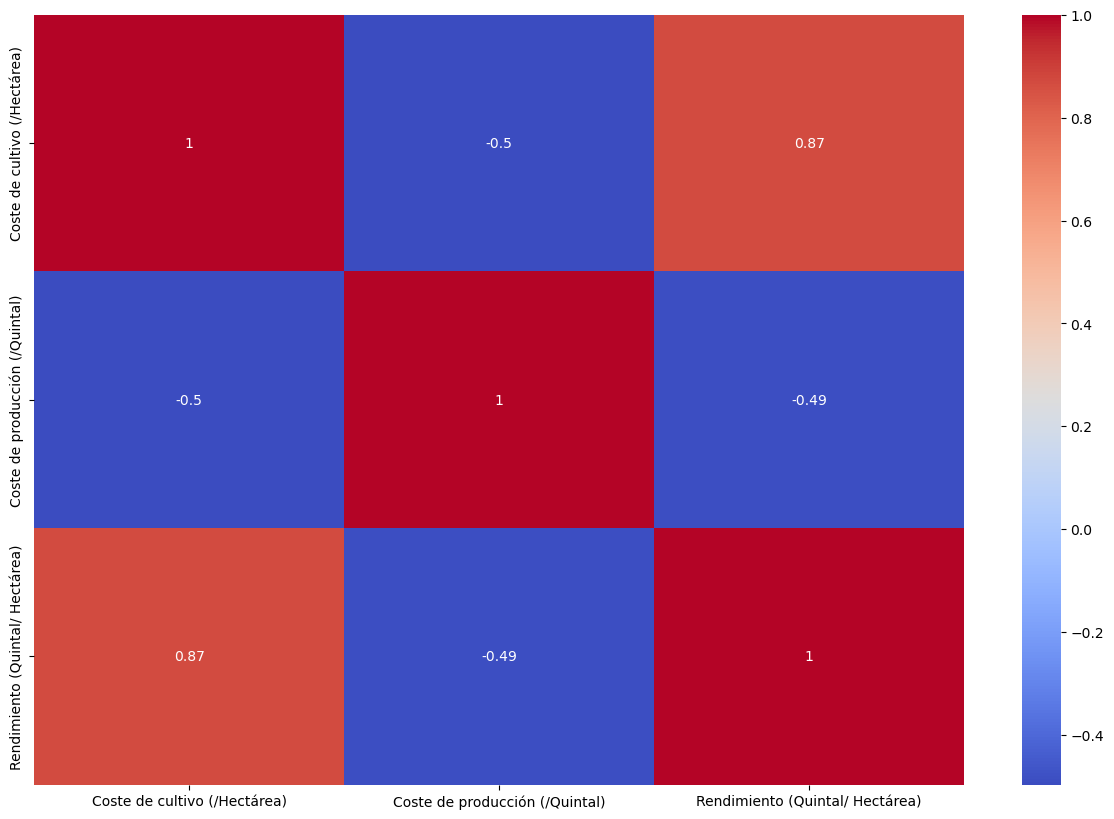

In [26]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot= True, cmap='coolwarm')
plt.show()

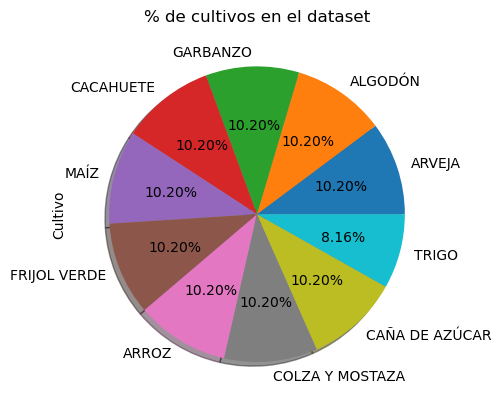

In [27]:
#create a pie chart to visualize the top 10 crop in the data
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

label = ['ARVEJA', 'ALGODÓN', 'GARBANZO', 'CACAHUETE', 'MAÍZ' ,'FRIJOL VERDE' ,'ARROZ',
 'COLZA Y MOSTAZA', 'CAÑA DE AZÚCAR' ,'TRIGO']

df1['Cultivo'].value_counts().sort_values(ascending=False)\
.plot(kind = 'pie',labels=label, colors=color,
      autopct ='%1.2f%%',
      shadow=True)
plt.title('% de cultivos en el dataset')
plt.show()

### Training and test

Se definen las variables X y Y. Donde x es la variable de entrada, y es la variable de salida

In [28]:
X = df1[['Coste de cultivo (/Hectárea)','Coste de producción (/Quintal)']]
y = df1['Rendimiento (Quintal/ Hectárea)']

In [29]:
len(X)

49

In [30]:
len(y)

49

l los datos en conjuntos de entrenamiento y de prueba se dividen tomando el 20% de los datos para prueba.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Arbol de decisión de regresion(Desicion Tree)

 Estos árboles se utilizan para predecir una variable objetivo continua, es decir, una variable que puede tomar un rango infinito de valores numéricos.

In [32]:
# Se crea un modelo de árbol de decisión
DTR = DecisionTreeRegressor(max_depth=5)

# Entrena el modelo en el conjunto de entrenamiento
DTR.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = DTR.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.796892857142858


compara los valores reales en el eje x con las predicciones en el eje y. La línea de 45 grados en rojo representa la línea ideal en la que las predicciones serían iguales a los valores reales. Cuanto más cerca estén los puntos azules de esta línea, mejor será el rendimiento del modelo.

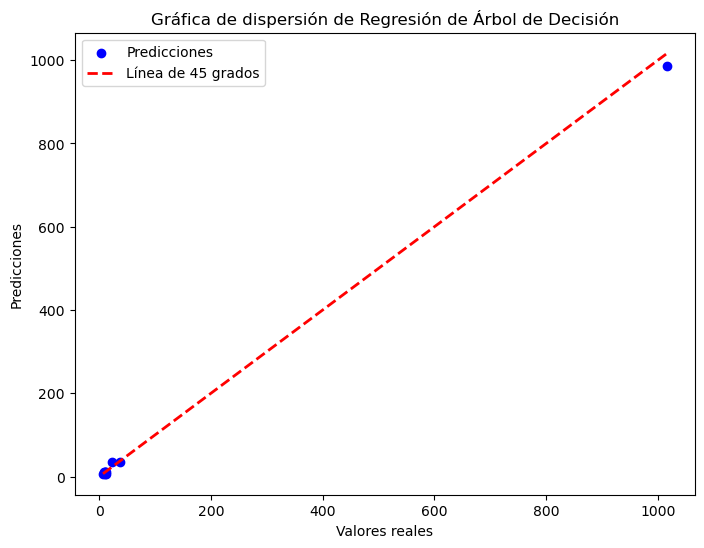

In [33]:
# Crear una gráfica de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--', label='Línea de 45 grados')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de dispersión de Regresión de Árbol de Decisión')
plt.legend()
plt.show()


### RandomForestRegressor 

In [34]:
RFR = RandomForestRegressor()

# Entrena el modelo en el conjunto de entrenamiento
RFR.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = RFR.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 17.300589999999957


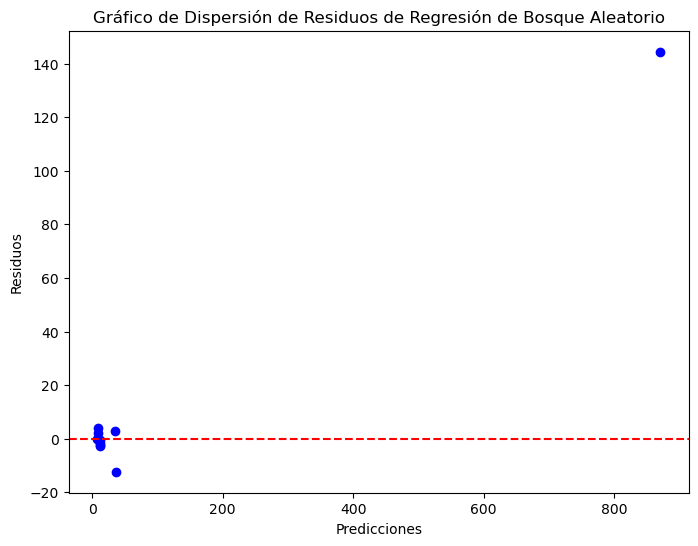

In [35]:
# Calcula los residuos
residuals = y_test - y_pred

# Crea un gráfico de dispersión de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c='blue', marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Dispersión de Residuos de Regresión de Bosque Aleatorio')
plt.show()


### XGBRegressor

In [36]:
XGBR = XGBRegressor()

# Entrena el modelo en el conjunto de entrenamiento
XGBR.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = XGBR.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.543472734451299


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22468\1154039481.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=results, x='Real', label='Real', shade=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22468\1154039481.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=results, x='Predicciones', label='Predicciones', shade=True)


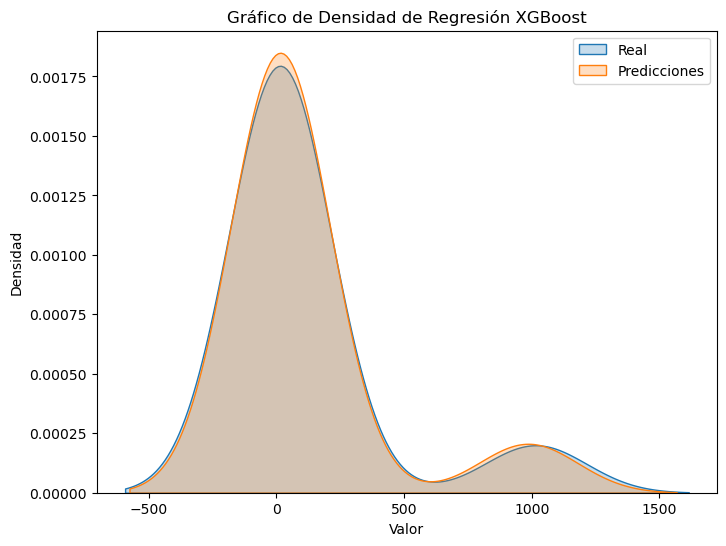

In [37]:
results = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred})

# Crear un gráfico de densidad para comparar las distribuciones
plt.figure(figsize=(8, 6))
sns.kdeplot(data=results, x='Real', label='Real', shade=True)
sns.kdeplot(data=results, x='Predicciones', label='Predicciones', shade=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Regresión XGBoost')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=069503a5-e123-48b8-95c3-255e1a2f2817' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>